In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans , DBSCAN


In [124]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=e54286959f32e27aa7bc9f7bcc46fcf8cc28fb904cc091f27fd357d436cc91e4
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [145]:
df = pd.read_csv("/content/creditcard_2023.csv")

In [146]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [147]:
df.shape

(67964, 31)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67964 entries, 0 to 67963
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      67964 non-null  int64  
 1   V1      67964 non-null  float64
 2   V2      67964 non-null  float64
 3   V3      67964 non-null  float64
 4   V4      67964 non-null  float64
 5   V5      67964 non-null  float64
 6   V6      67964 non-null  float64
 7   V7      67964 non-null  float64
 8   V8      67964 non-null  float64
 9   V9      67964 non-null  float64
 10  V10     67964 non-null  float64
 11  V11     67964 non-null  float64
 12  V12     67964 non-null  float64
 13  V13     67964 non-null  float64
 14  V14     67964 non-null  float64
 15  V15     67964 non-null  float64
 16  V16     67964 non-null  float64
 17  V17     67964 non-null  float64
 18  V18     67964 non-null  float64
 19  V19     67963 non-null  float64
 20  V20     67963 non-null  float64
 21  V21     67963 non-null  float64
 22

In [149]:
#checking null values
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [150]:
df[df['V25'].isna()]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67963,67963,-0.135251,-0.025306,1.431927,-0.67637,0.251946,-0.041015,0.729555,-0.215479,0.31975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
## check the number of fraudulent  and not
fraudulent = df[df['Class']==1].shape[0]
not_fraudulent = df[df['Class']==0].shape[0]

In [152]:
df['Class'].value_counts()

0.0    67794
1.0      169
Name: Class, dtype: int64

In [153]:
fraudulent , not_fraudulent

(169, 67794)

In [154]:
df.drop([67963],axis=0,inplace=True)

In [155]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

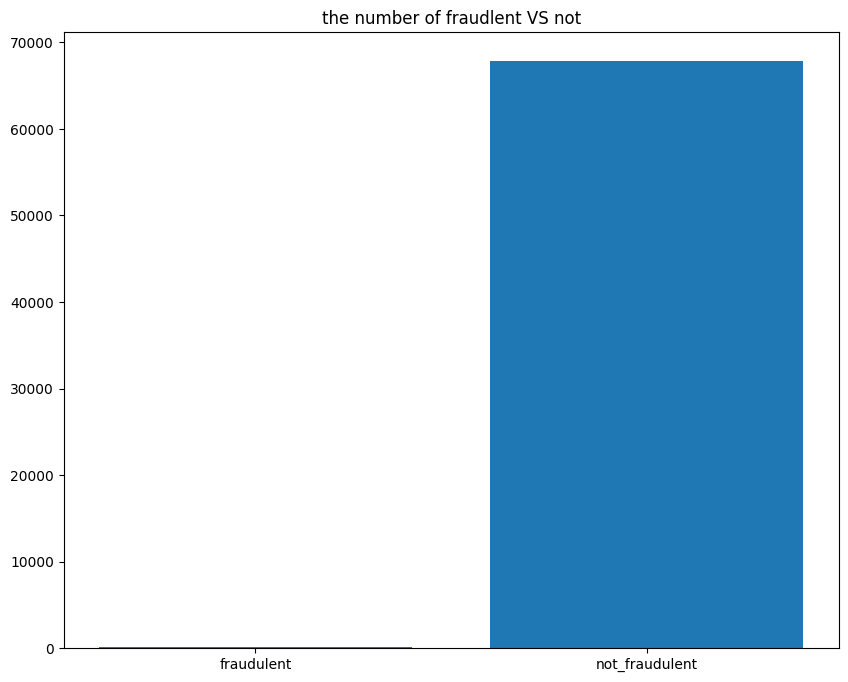

In [156]:
plt.figure(figsize=(10,8))
plt.bar(['fraudulent' , 'not_fraudulent'],[fraudulent , not_fraudulent])
plt.title("the number of fraudlent VS not")
plt.show()

In [157]:
df.drop('id',axis=1,inplace=True)

In [158]:
df.shape

(67963, 30)

In [159]:
x = df.drop('Class',axis=1)
y = df['Class']

In [160]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , shuffle=True, random_state=40, stratify=y)

## checking outliers

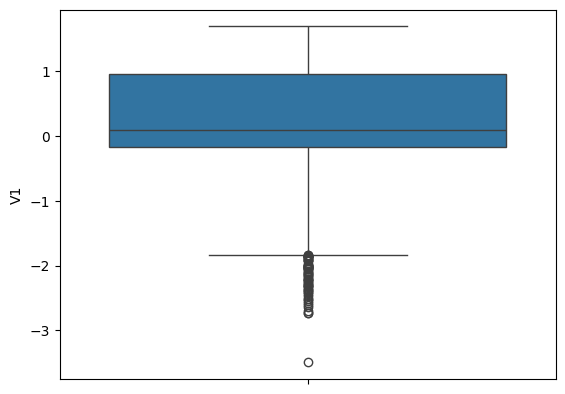

In [161]:
sns.boxplot(x_train['V1'])
plt.show()

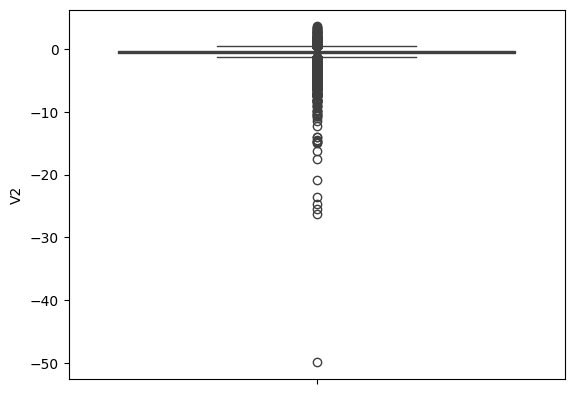

In [162]:
sns.boxplot(x_train['V2'])
plt.show()

<Axes: ylabel='V3'>

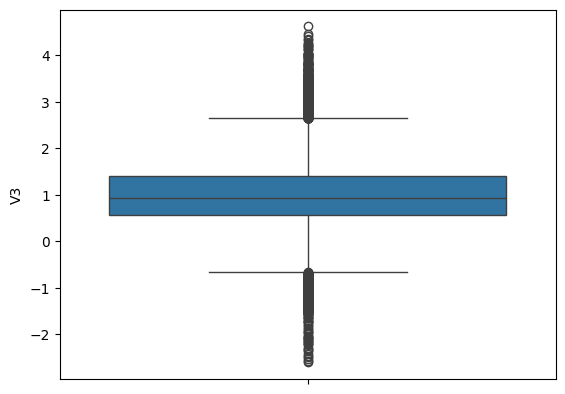

In [163]:
sns.boxplot(x_train['V3'])

In [164]:
percentile_limits = [0.05,0.05]
for i in range(1,29):
  col = 'V'+str(i)
  x_train[col] = winsorize(x_train[col],limits=percentile_limits)



In [165]:
kmeans = KMeans(n_clusters=2,n_init='auto')

In [166]:
kmeans.fit(x_train)

KMeans(n_clusters=2, n_init='auto')

In [167]:
kmeans.cluster_centers_

array([[ 3.28895050e-01, -4.55929165e-01,  1.01266045e+00,
        -6.38636634e-01,  2.04055193e-01,  5.00408423e-01,
         4.27043022e-01, -1.24031253e-01,  5.76880813e-01,
         6.15359902e-01, -5.39817586e-01,  6.74180251e-01,
         1.48586146e-01,  8.64272757e-01,  2.14724122e-01,
         5.60266856e-01,  4.96632701e-01,  3.27438449e-01,
        -2.59849159e-01, -1.36908357e-01, -1.23092270e-01,
        -1.17107787e-01, -6.51180174e-02,  1.53448135e-01,
         1.60994195e-01, -2.06021810e-02, -2.17729919e-01,
        -7.17844904e-02,  1.80952630e+04],
       [ 3.35999030e-01, -4.60560463e-01,  1.01544315e+00,
        -6.40815787e-01,  2.06531078e-01,  5.01466997e-01,
         4.28910949e-01, -1.24999875e-01,  5.81341280e-01,
         6.15981771e-01, -5.31903229e-01,  6.72957263e-01,
         1.49080858e-01,  8.66738967e-01,  2.18684744e-01,
         5.58917086e-01,  4.92657294e-01,  3.32879882e-01,
        -2.54883533e-01, -1.35963558e-01, -1.23317225e-01,
        -1.17

In [168]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [169]:
kmeans.inertia_

607562770644.4729

In [170]:
kmeans.predict(x_test[0:20])

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
      dtype=int32)

In [171]:
y_test[0:20]

54907    0.0
42854    0.0
17980    0.0
3863     0.0
10057    0.0
18486    0.0
62518    0.0
42351    0.0
54364    0.0
51635    0.0
13163    0.0
40963    0.0
39215    0.0
55       0.0
38802    0.0
60269    0.0
18568    0.0
24879    0.0
65101    0.0
58100    0.0
Name: Class, dtype: float64

In [172]:
db = DBSCAN(eps=2.2)

In [173]:
db.fit(x_train)

DBSCAN(eps=2.2)

In [174]:
print(pd.unique(db.labels_))

[-1  0]


In [175]:
db.fit_predict(x_test[0:30])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [176]:
y_test[0:30]

54907    0.0
42854    0.0
17980    0.0
3863     0.0
10057    0.0
18486    0.0
62518    0.0
42351    0.0
54364    0.0
51635    0.0
13163    0.0
40963    0.0
39215    0.0
55       0.0
38802    0.0
60269    0.0
18568    0.0
24879    0.0
65101    0.0
58100    0.0
64826    0.0
61915    0.0
16126    0.0
62654    0.0
401      0.0
4261     0.0
28655    0.0
1487     0.0
13811    0.0
26281    0.0
Name: Class, dtype: float64

In [177]:
from skfuzzy.cluster import cmeans

In [178]:
centers, u, u0, d, jm, p, fpc = cmeans(x_train,2,2,0.001,maxiter=1000)

In [179]:
centers

array([[-1.94655228e-02,  9.62801477e-02,  7.83957319e-02, ...,
         3.89183499e-02, -6.00360411e-03,  2.36246868e-01],
       [ 3.08919972e+02,  1.53592986e+04,  1.26522689e+04, ...,
         1.68972285e+04,  1.83951783e+04,  1.63050285e+04]])

In [180]:
u

array([[9.99999998e-01, 9.99999997e-01, 9.99999994e-01, 9.99999995e-01,
        9.99999999e-01, 9.99999998e-01, 9.99999999e-01, 9.99999999e-01,
        9.99999997e-01, 9.99999998e-01, 9.99999996e-01, 9.99999997e-01,
        9.99999995e-01, 9.99999996e-01, 9.99999996e-01, 9.99999998e-01,
        9.99999999e-01, 9.99999999e-01, 9.99999997e-01, 9.99999999e-01,
        9.99999999e-01, 9.99999998e-01, 9.99999999e-01, 9.99999995e-01,
        9.99999998e-01, 9.99999995e-01, 9.99999999e-01, 9.99999999e-01,
        8.05646762e-15],
       [1.89849041e-09, 2.57858360e-09, 5.64706474e-09, 4.96443943e-09,
        6.87330692e-10, 2.34301851e-09, 7.37265937e-10, 5.21555882e-10,
        2.85554729e-09, 1.69574806e-09, 4.06727397e-09, 3.12550744e-09,
        4.83881696e-09, 3.64608200e-09, 4.48894344e-09, 1.99213408e-09,
        9.00852135e-10, 1.35354778e-09, 2.82043970e-09, 1.01595877e-09,
        5.17532980e-10, 1.65034282e-09, 5.64711932e-10, 5.26990142e-09,
        1.93532882e-09, 5.43943491e-09,

In [181]:
u0

array([[0.35012554, 0.32209285, 0.84095151, 0.22052336, 0.52424707,
        0.33563276, 0.40106266, 0.83204314, 0.42816945, 0.58997754,
        0.57727457, 0.10436764, 0.18801421, 0.6391297 , 0.589143  ,
        0.68258036, 0.49350017, 0.71708255, 0.38455128, 0.27203413,
        0.59505407, 0.78354789, 0.59012102, 0.48591578, 0.62132453,
        0.84509468, 0.53387118, 0.36164014, 0.17302459],
       [0.64987446, 0.67790715, 0.15904849, 0.77947664, 0.47575293,
        0.66436724, 0.59893734, 0.16795686, 0.57183055, 0.41002246,
        0.42272543, 0.89563236, 0.81198579, 0.3608703 , 0.410857  ,
        0.31741964, 0.50649983, 0.28291745, 0.61544872, 0.72796587,
        0.40494593, 0.21645211, 0.40987898, 0.51408422, 0.37867547,
        0.15490532, 0.46612882, 0.63835986, 0.82697541]])

In [182]:
d

array([[1.36481700e+02, 1.59067772e+02, 2.35376488e+02, 2.20714869e+02,
        8.21214289e+01, 1.51618926e+02, 8.50510512e+01, 7.15373718e+01,
        1.67381781e+02, 1.28986179e+02, 1.99777009e+02, 1.75114127e+02,
        2.17893761e+02, 1.89133707e+02, 2.09867619e+02, 1.39805189e+02,
        9.40139965e+01, 1.15241018e+02, 1.66358351e+02, 9.98437635e+01,
        7.12609396e+01, 1.27253413e+02, 7.44379586e+01, 2.27392586e+02,
        1.37800967e+02, 2.31023697e+02, 9.87497947e+01, 8.76932905e+01,
        3.13238307e+06],
       [3.13234954e+06, 3.13250368e+06, 3.13221593e+06, 3.13253897e+06,
        3.13237413e+06, 3.13231590e+06, 3.13233065e+06, 3.13243853e+06,
        3.13230113e+06, 3.13229396e+06, 3.13251956e+06, 3.13228243e+06,
        3.13238544e+06, 3.13224495e+06, 3.13237225e+06, 3.13230474e+06,
        3.13231737e+06, 3.13235006e+06, 3.13246477e+06, 3.13244102e+06,
        3.13243833e+06, 3.13243706e+06, 3.13242710e+06, 3.13238440e+06,
        3.13238319e+06, 3.13241746e+06,

In [183]:
jm

array([6.46105569e+12, 2.05951500e+12, 1.56089638e+06])

In [184]:
p

3

In [185]:
fpc

0.9999999952183861